In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

wiki_url="https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report"
response=requests.get(wiki_url)
soup=BeautifulSoup(response.text,'html.parser')
table=soup.find('table',{'class':'wikitable sortable'}).tbody

rows = table.find_all('tr')
columns =[c.text.replace('\n','') for c in rows[0].find_all('th')]
df=pd.DataFrame(columns=columns)
for i in range(1, len(rows)):
    tds=rows[i].find_all('td')
    values = [td.text.replace('\xa0','').replace('\n','') for td in tds]
    df=df.append(pd.Series(values, index=columns), ignore_index=True)
values

df=df.to_csv(r'C:\Users\satvi\OneDrive\Desktop\ds\assignment 1'+'\\Worldhappiness.csv',index=False,header=True)
df

In [2]:
df=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\ds\assignment 1'+'\\Worldhappiness.csv',index_col='Overall rank')
df.sort_values(by='Score',ascending=True)
df.head(2)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495


In [3]:
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace('Country or region','Country_or_region')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[(),]','')
df.columns

Index(['Country_or_region', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [5]:
df.head(2)

,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Overall rank,,,,,,,,
1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495


#Distribution graph


In [6]:
column1=df['Score']
column2=df['GDP_per_capita']

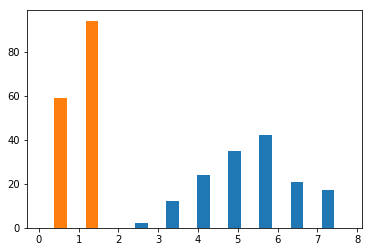

In [8]:
x = [column1, column2]
plt.hist(x)
plt.show()

In [9]:
mean=df.mean()

In [10]:
median=df['Score'].median()

In [11]:
def above_median(x):
    return x > median
df['above']=df['Score'].apply(above_median)
df['above'].sum()

76

# correlation

[[1.         0.77528394]
 [0.77528394 1.        ]]


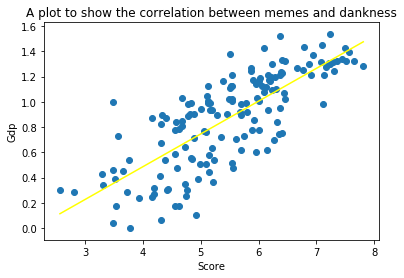

In [12]:
column1=df['Score']
column2=df['GDP_per_capita']
Score_Vs_Gdp=np.corrcoef(column1,column2)
print(Score_Vs_Gdp)

plt.scatter(column1, column2) 
plt.title('A plot to show the correlation between memes and dankness')
plt.xlabel('Score')
plt.ylabel('Gdp')
plt.plot(np.unique(column1), np.poly1d(np.polyfit(column1, column2, 1))(np.unique(column1)), color='yellow')
plt.show()

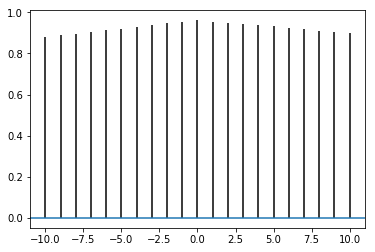

In [13]:
x=plt.xcorr(column1,column2)

In [14]:
# # 2nd url
url2='https://simple.wikipedia.org/wiki/List_of_countries_by_continents'
response2= requests.get(url2)
soup2=BeautifulSoup(response2.text,'html.parser')

In [15]:
continent_tags= soup2.findAll('span',{'class','toctext'})
continent_list=[]
for i in range (0,len(continent_tags)-2):
    d=continent_tags[i].text
    continent_list.append(d)
print(continent_list)

['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'South America', 'Australia/Oceania']


In [16]:
ol_tags= soup2.findAll('ol')
country_list=[]
for j in range(0,len(ol_tags)-2):
    li_tags=ol_tags[j].findAll('li')
    country=[]
    for li_tag in li_tags:
        link_tag=li_tag.a
        country_list.append(link_tag.text)
#print(country_list)

In [18]:
continent_countries_dict={}
Africa=country_list[country_list.index('Algeria'):country_list.index('Zimbabwe')+1]
Asia=country_list[country_list.index('Afghanistan'):country_list.index('Yemen')+1]
Europe=country_list[country_list.index('Albania'):country_list.index('Vatican City')+1]
North_America=country_list[country_list.index('Antigua and Barbuda'):country_list.index('US Virgin Islands')+1]
South_America=country_list[country_list.index('Argentina'):country_list.index('Venezuela')+1]
Australia=country_list[country_list.index('Australia'):country_list.index('Vanuatu')+1]

continent_countries_dict['Africa']=Africa
continent_countries_dict['Asia']=Asia
continent_countries_dict['Europe']=Europe
continent_countries_dict['North_America']=North_America
continent_countries_dict['South_America']=South_America
continent_countries_dict['Australia']=Australia

headings=['Continent','Countries']

cf=pd.DataFrame(columns=headings)

x=0
for values in continent_countries_dict.values():
    for value in values:
        print('{}---{}'.format(list(continent_countries_dict.keys())[x],value))
        df=df.append(pd.Series([list(continent_countries_dict.keys())[x],value],index=headings),ignore_index=True)
    x=x+1
    
cf=cf.to_csv(r'C:\Users\satvi\OneDrive\Desktop\ds\assignment 1'+'\\continent_countries.csv',index=False)

Africa---Algeria
Africa---Angola
Africa---Benin
Africa---Botswana
Africa---Burkina Faso
Africa---Burundi
Africa---Cameroon
Africa---Cape Verde
Africa---Central African Republic
Africa---Chad
Africa---Comoros
Africa---Republic of the Congo
Africa---Democratic Republic of the Congo
Africa---Côte d'Ivoire
Africa---Djibouti
Africa---Egypt
Africa---Equatorial Guinea
Africa---Eritrea
Africa---Ethiopia
Africa---Gabon
Africa---The Gambia
Africa---Ghana
Africa---Guinea
Africa---Guinea-Bissau
Africa---Kenya
Africa---Lesotho
Africa---Liberia
Africa---Libya
Africa---Madagascar
Africa---Malawi
Africa---Mali
Africa---Mauritania
Africa---Mauritius
Africa---Morocco
Africa---Mozambique
Africa---Namibia
Africa---Niger
Africa---Nigeria
Africa---Rwanda
Africa---São Tomé and Príncipe
Africa---Senegal
Africa---Seychelles
Africa---Sierra Leone
Africa---Somalia
Africa---South Africa
Africa---South Sudan
Africa---Sudan
Africa---Swaziland
Africa---Tanzania
Africa---Togo
Africa---Tunisia
Africa---Uganda
Africa--